In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#Te permite hacer plots aunque este enmedio de algo
%matplotlib inline 
pd.set_option('display.max_columns', None) #asi me deja ver todas las columnas.

In [3]:
df = pd.read_csv("C:/Users/astri/Ironhack/Labs/lab-eda-univariate/amz_uk_price_prediction_dataset.csv.zip")

In [5]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [7]:
df.shape

(2443651, 9)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2443651 entries, 0 to 2443650
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   uid                int64  
 1   asin               object 
 2   title              object 
 3   stars              float64
 4   reviews            int64  
 5   price              float64
 6   isBestSeller       bool   
 7   boughtInLastMonth  int64  
 8   category           object 
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 151.5+ MB


**Verificamos que columnas son numericas y cuales no**

In [12]:
num = df.select_dtypes(include = "number")
cat = df.select_dtypes(exclude = "number")

In [21]:
num.nunique()

uid                  2443651
stars                     42
reviews                19446
price                  82916
boughtInLastMonth         25
dtype: int64

In [34]:
num.stars.unique()

array([4.7, 4.6, 4.5, 4.8, 0. , 4.4, 4.3, 4.1, 4.9, 5. , 3.8, 3.6, 4. ,
       4.2, 3. , 3.9, 2.5, 3.4, 3.7, 3.2, 3.3, 3.5, 2.7, 2.1, 1. , 3.1,
       2. , 2.9, 2.8, 1.5, 2.2, 2.3, 2.6, 2.4, 1.4, 1.9, 1.8, 1.7, 1.6,
       1.2, 1.3, 1.1])

In [23]:
cat.nunique()

asin            2222742
title           2077591
isBestSeller          2
category            296
dtype: int64

**What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?**


**Frequency Tables:**

Generate a frequency table for the product category.
Which are the top 5 most listed product categories?
Visualizations:

Display the distribution of products across different categories using a bar chart. If you face problems understanding the chart, do it for a subset of top categories.
For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

In [76]:
frequency_table = cat['category'].value_counts()
frequency_table


category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Alexa Built-In Devices                       107
Motorbike Chassis                            107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64

In [44]:
proportion_table = cat.category.value_counts(normalize=True).round(2) #el normalize ya me lo da en porcentaje (frecuencia relativa)
proportion_table

category
Sports & Outdoors                         0.34
Beauty                                    0.01
Handmade Clothing, Shoes & Accessories    0.01
Bath & Body                               0.01
Birthday Gifts                            0.01
                                          ... 
Alexa Built-In Devices                    0.00
Motorbike Chassis                         0.00
Plugs                                     0.00
Smart Home Security & Lighting            0.00
Smart Speakers                            0.00
Name: proportion, Length: 296, dtype: float64

In [98]:
df2 = pd.concat([frequency_table, proportion_table], axis=1) #el indice seria MSZoning por eso ponemos el axis=1
df2

,count,proportion
category,,
Sports & Outdoors,836265,0.34
Beauty,19312,0.01
"Handmade Clothing, Shoes & Accessories",19229,0.01
Bath & Body,19092,0.01
Birthday Gifts,18978,0.01
...,...,...
Alexa Built-In Devices,107,0.00
Motorbike Chassis,107,0.00
Plugs,107,0.00


In [100]:
# Cambiale los nombres de las columnas
df2.columns = ['absolute_frequency', 'relative_frequency']
df2

,absolute_frequency,relative_frequency
category,,
Sports & Outdoors,836265,0.34
Beauty,19312,0.01
"Handmade Clothing, Shoes & Accessories",19229,0.01
Bath & Body,19092,0.01
Birthday Gifts,18978,0.01
...,...,...
Alexa Built-In Devices,107,0.00
Motorbike Chassis,107,0.00
Plugs,107,0.00


In [102]:
total_absolute = frequency_table.sum()
print(total_absolute)
total_relative = proportion_table.sum() #siempre debe sumar 1, si no me da justo el 1 es porque no redondee previamente.
print(total_relative)

2443651
0.54


In [104]:
#a;ado una fila 
total_row = pd.DataFrame({
    'absolute_frequency': [total_absolute],
    'relative_frequency': [total_relative]
}, index=['Total'])
total_row

,absolute_frequency,relative_frequency
Total,2443651,0.54


In [106]:
df3 = pd.concat([df2,total_row]) #aqui no pongo axis1 porque quiero que lo ponga abajo.

In [108]:
df3

,absolute_frequency,relative_frequency
Sports & Outdoors,836265,0.34
Beauty,19312,0.01
"Handmade Clothing, Shoes & Accessories",19229,0.01
Bath & Body,19092,0.01
Birthday Gifts,18978,0.01
...,...,...
Motorbike Chassis,107,0.00
Plugs,107,0.00
Smart Home Security & Lighting,104,0.00
Smart Speakers,54,0.00


In [110]:
df2 = df2.reset_index()## PORQUE HACEMOS ESTO? Para que MSZoning este en el eje x
df2

,category,absolute_frequency,relative_frequency
0,Sports & Outdoors,836265,0.34
1,Beauty,19312,0.01
2,"Handmade Clothing, Shoes & Accessories",19229,0.01
3,Bath & Body,19092,0.01
4,Birthday Gifts,18978,0.01
...,...,...,...
291,Alexa Built-In Devices,107,0.00
292,Motorbike Chassis,107,0.00
293,Plugs,107,0.00
294,Smart Home Security & Lighting,104,0.00


In [72]:
#df_top5 = frequency_table.nlargest()
#df_top5

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

In [114]:
top_5_categories = frequency_table.head(5)
top_5_categories


pandas.core.series.Series

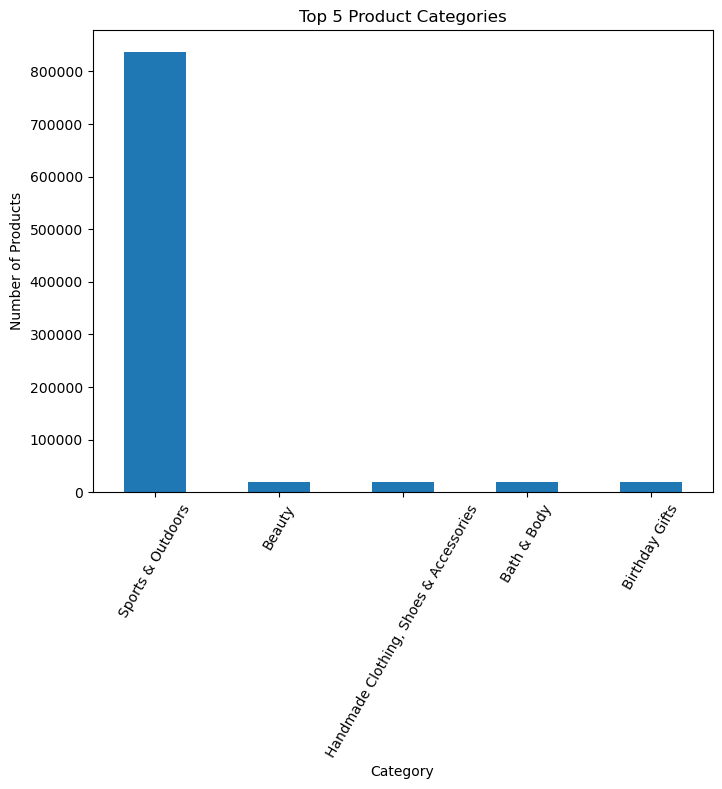

In [96]:
plt.figure(figsize=(8, 6))
top_5_categories.plot(kind='bar')
plt.title("Top 5 Product Categories")
plt.xlabel("Category")
plt.ylabel("Number of Products")
plt.xticks(rotation=60)
plt.show()


Conclusion: La categoria de deportes domina sobre las demas categorias ya que representa el 34% sobre el total de las categorias.

**Part 2: Delving into Product Pricing**

**
Business Question**
 How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

Measures of Centrality:

Calculate the mean, median, and mode for the price of products.
What's the average price point of products listed? How does this compare with the most common price point (mode)?
Measures of Dispersion:

Determine the variance, standard deviation, range, and interquartile range for product price.
How varied are the product prices? Are there any indicators of a significant spread in prices?
Visualizations:

Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. If its hard to read these diagrams, think why this is, and explain how it could be solved..
Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing.

In [191]:
df.price.describe().round(0)

count    2443651.0
mean          89.0
std          346.0
min            0.0
25%           10.0
50%           19.0
75%           46.0
max       100000.0
Name: price, dtype: float64

the average price point of products listed is 89

In [153]:
df.price.mode().round(0)

0    10.0
Name: price, dtype: float64

How does this compare with the most common price point (mode)? Measures of Dispersion:

Hay una dispersion significativa.

Determine the variance, standard deviation, range, and interquartile range for product price. How varied are the product prices? Are there any indicators of a significant spread in prices? .


In [157]:
df["price"].var()

119445.48532256528

In [159]:
df["price"].std()

345.60886175352226

In [164]:
range = df["price"].max() - df["price"].min()
range

100000.0

Visualizations:

Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. If its hard to read these diagrams, think why this is, and explain how it could be solved..

Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing.

In [171]:
df.price.skew().round(2)

27.49

Skewness > 0: The distribution is positively skewed (or right-skewed), meaning there is a longer tail on the right side of the distribution. The mass of the distribution is concentrated on the left of the figure.

In [174]:
# kurtosis --> kurtosis() nos saldria puntiaguda.

df.price.kurtosis().round(2)

4241.62

Excess Kurtosis > 0 (or Kurtosis > 3 for non-excess): The distribution is leptokurtic. It has fatter tails and a sharper peak than the normal distribution, indicating more extreme values (outliers) than expected in a normal distribution.

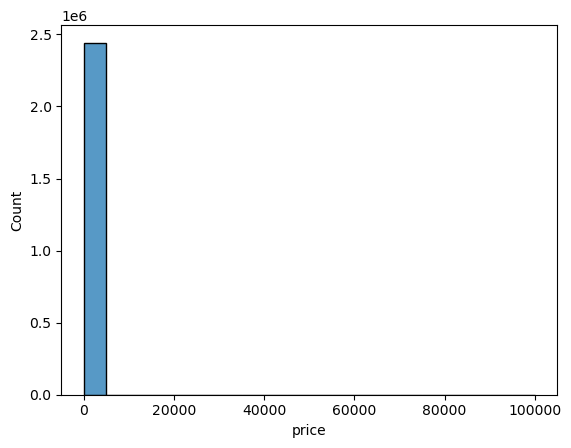

In [185]:
sns.histplot(df.price, bins=20) #numero de bins es el numero de barras.
plt.show()

Yes, because there are products that are priced significantly higher than the rest, in order to solved this problem we can do a hisploc for the 5 lowest prices and the 5 higer prices.


Are there products that are priced significantly higher than the rest? Yes

Use a box plot to showcase the spread and potential outliers in product pricing.

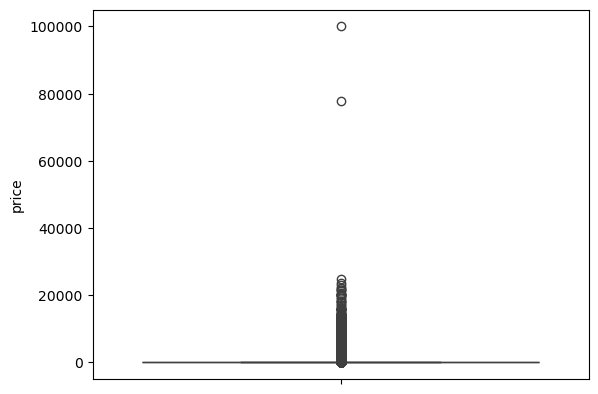

In [194]:
sns.boxplot(data=df.price)
plt.show()

Part 3: Unpacking Product Ratings
Business Question: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

Measures of Centrality:

Calculate the mean, median, and mode for the rating of products.
How do customers generally rate products? Is there a common trend?
Measures of Dispersion:

Determine the variance, standard deviation, and interquartile range for product rating.
Are the ratings consistent, or is there a wide variation in customer feedback?
Shape of the Distribution:

Calculate the skewness and kurtosis for the rating column.
Are the ratings normally distributed, or do they lean towards higher or lower values?
Visualizations:

Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

The rating goes from 0 to 5, there are no determine patterns, we can see that most of the products have a rating of zero stars, this could be because some people arent use to leave a rating. 

In [211]:
frequency_table = df.stars.value_counts()
frequency_table



stars
0.0    1225641
4.5     151577
4.6     136995
4.4     136165
5.0     128492
4.3     112564
4.7      94566
4.2      86871
4.0      66089
4.1      65115
4.8      41858
3.9      36555
3.8      27876
3.7      21137
3.6      16219
3.5      14673
3.0      12819
4.9      11081
3.4      10355
1.0       8484
3.3       8269
3.2       5771
3.1       4679
2.0       3901
2.9       3341
2.8       2306
2.7       2104
2.5       2103
2.6       1579
2.4       1060
2.3        734
2.2        602
2.1        540
1.5        404
1.9        300
1.8        249
1.7        177
1.4        149
1.6        147
1.3         78
1.2         23
1.1          3
Name: count, dtype: int64

In [209]:
proportion_table = df.stars.value_counts(normalize=True).round(2) #el normalize ya me lo da en porcentaje (frecuencia relativa)
proportion_table

stars
0.0    0.50
4.5    0.06
4.6    0.06
4.4    0.06
5.0    0.05
4.3    0.05
4.7    0.04
4.2    0.04
4.0    0.03
4.1    0.03
4.8    0.02
3.9    0.01
3.8    0.01
3.7    0.01
3.6    0.01
3.5    0.01
3.0    0.01
4.9    0.00
3.4    0.00
1.0    0.00
3.3    0.00
3.2    0.00
3.1    0.00
2.0    0.00
2.9    0.00
2.8    0.00
2.7    0.00
2.5    0.00
2.6    0.00
2.4    0.00
2.3    0.00
2.2    0.00
2.1    0.00
1.5    0.00
1.9    0.00
1.8    0.00
1.7    0.00
1.4    0.00
1.6    0.00
1.3    0.00
1.2    0.00
1.1    0.00
Name: proportion, dtype: float64

In [217]:
#Calculate the mean, median, and mode for the rating of products.
df.stars.describe().round(0)

count    2443651.0
mean           2.0
std            2.0
min            0.0
25%            0.0
50%            0.0
75%            4.0
max            5.0
Name: stars, dtype: float64

Determine the variance, standard deviation, and interquartile range for product rating. Are the ratings consistent, or is there a wide variation in customer feedback? Shape of the Distribution:


In [220]:
df["stars"].var()

4.81743402976196

In [222]:
df["stars"].std()

2.1948653785054697

In [226]:
range = df["stars"].max() - df["stars"].min()
range

5.0

In [234]:
# Calculate Q1 and Q3
Q1 = df['stars'].quantile(0.25)
Q3 = df['stars'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

print("Interquartile Range (IQR) for product rating:", IQR)


Interquartile Range (IQR) for product rating: 4.4


In [236]:
#Skewness > 0: The distribution is positively skewed (or right-skewed), meaning there is a longer tail on the right side of the distribution. 
#The mass of the distribution is concentrated on the left of the figure.
df.stars.skew().round(2)

0.08

In [238]:
#Excess Kurtosis < 0 (or Kurtosis < 3 for non-excess): The distribution is platykurtic. 
#It has thinner tails and a flatter peak than the normal distribution, indicating fewer extreme values than expected in a normal distribution.
df.stars.kurtosis().round(2)

-1.93

We can identify by the skew that the distribution is right-skewe so theres a longer tail on the right side. this is correct because the mayority of the rating is on zero and then it changes from 3 to 5.

Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

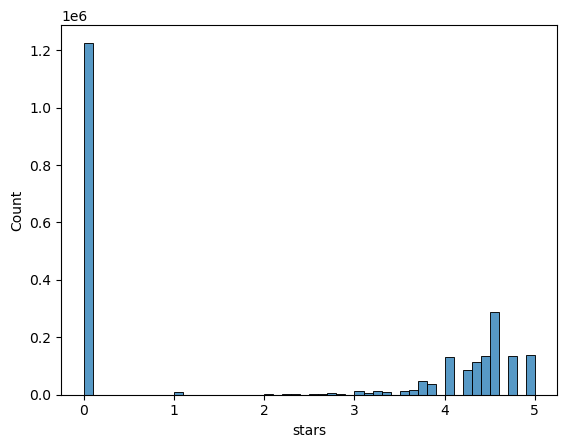

In [242]:
sns.histplot(df.stars, bins=50) #numero de bins es el numero de barras.
plt.show()

 Is there a specific rating that is more common?

 Yes, the mos common rating is zero.